**Анализ датасета**

Выполненные пункты:

1.   Импортируем датасет и смотрим информацию о структуре и содержимом данных
2.   Находим дубликаты
3.   Анализируем типы признаки
4.   Анализируем признаки на NaN
5.   Строим матрицу корреляции


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)

# Анализ датасета




## 1) Импортируем датасет и смотрим информацию о структуре и содержимом данных

In [ ]:
data_sold_flats = pd.read_csv('/content/drive/MyDrive/E-soft/ТЗ/ver_final/sold_flats_2020-09-30.csv', sep=",")
display(data_sold_flats.info())

<ipython-input-3-bbf41517e740>:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  data_sold_flats = pd.read_csv('/content/drive/MyDrive/E-soft/ТЗ/ver_final/sold_flats_2020-09-30.csv', sep=",")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71761 entries, 0 to 71760
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                71761 non-null  int64  
 1   status            71761 non-null  object 
 2   city_id           71761 non-null  int64  
 3   district_id       71761 non-null  int64  
 4   street_id         71761 non-null  int64  
 5   price             71751 non-null  float64
 6   date_sold         71761 non-null  object 
 7   sold_price        71621 non-null  float64
 8   metro_station_id  71756 non-null  float64
 9   flat_on_floor     71761 non-null  int64  
 10  floor_num         71755 non-null  float64
 11  floors_cnt        71755 non-null  float64
 12  rooms_cnt         71479 non-null  float64
 13  bedrooms_cnt      71015 non-null  float64
 14  building_year     70168 non-null  float64
 15  area_total        71758 non-null  float64
 16  area_live         71758 non-null  float6

None

In [ ]:
display(data_sold_flats.head(1000))

,id,status,city_id,district_id,street_id,price,date_sold,sold_price,metro_station_id,flat_on_floor,floor_num,floors_cnt,rooms_cnt,bedrooms_cnt,building_year,area_total,area_live,area_kitchen,area_balcony,builder_id,type,two_levels,levels_count,bathroom,bathrooms_cnt,plate,windows,territory,keep,komunal_cost,series_id,wall_id,balcon,loggia,ceiling_height,closed_yard,longitude,latitude
0,86668,sold,23,12440,353,4980.0,2014-05-16,4880.0,0.0,0,5.0,9.0,3.0,0.0,1989.0,62.0,0.0,8.0,0,0,flat,no,1,unite,NaN,electric,plastic,"parking,closed,elevator",cosmetic,NaN,46.0,11.0,yes_balcon,0,0.00,NaN,65.552498,57.143242
1,87951,sold,23,5279,263,2550.0,2014-02-17,2550.0,0.0,0,5.0,10.0,1.0,0.0,2008.0,40.0,0.0,8.0,0,0,flat,no,1,separate,NaN,electric,wood,"parking,guest_parking,yard_opened,elevator",well_black,1000,50.0,12.0,yes_balcon,0,0.00,NaN,65.567250,57.110282
2,90703,sold,23,588,339,2200.0,2014-07-04,2200.0,0.0,0,5.0,5.0,2.0,0.0,1969.0,44.0,0.0,6.0,0,0,flat,no,1,separate,NaN,NaN,plastic,"parking,yard_opened,without_elevator",cosmetic,NaN,45.0,12.0,yes_balcon,0,0.00,NaN,65.593887,57.147141
3,92948,sold,23,139,546,650.0,2014-09-03,650.0,0.0,0,1.0,4.0,2.0,0.0,1960.0,42.0,26.7,6.0,0,0,flat,no,1,separate,NaN,no_plate,plastic,"parking,guest_parking,yard_opened,without_elev...",need,NaN,79.0,11.0,no_balcon,0,2.50,NaN,65.518670,57.144386
4,102940,sold,23,5279,263,3300.0,2017-11-09,3300.0,0.0,0,1.0,10.0,3.0,3.0,2007.0,65.0,38.0,12.0,4,0,flat,no,1,separate,2.0,electric,plastic,"kolyasochnaya,parking,yard_opened,elevator",good,NaN,50.0,12.0,loggia,0,2.53,NaN,65.568459,57.113392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,277834,sold,23,121,288,2950.0,2014-05-05,2850.0,0.0,0,5.0,5.0,3.0,0.0,1977.0,50.0,0.0,0.0,0,0,flat,no,1,separate,NaN,NaN,plastic,"parking,yard_opened,without_elevator",cosmetic,NaN,49.0,11.0,yes_balcon,0,0.00,NaN,65.635377,57.176508
996,277846,sold,146,1829,5582,1750.0,2014-05-30,1730.0,0.0,0,4.0,9.0,1.0,0.0,2009.0,44.0,18.0,15.0,0,0,flat,no,1,unite,NaN,gas,plastic,"child_place,parking,elevator",cosmetic,1800,1233.0,11.0,loggia,0,2.00,NaN,44.798728,48.752838
997,277868,sold,23,464,283,3350.0,2014-03-28,3300.0,0.0,0,7.0,7.0,3.0,0.0,1995.0,66.0,0.0,0.0,0,0,flat,no,1,separate,NaN,electric,plastic,"parking,yard_opened,elevator",cosmetic,NaN,133.0,12.0,balcon,0,0.00,NaN,65.641694,57.152599
998,277893,sold,66,837,2106,4250.0,2014-03-07,4250.0,0.0,0,10.0,15.0,2.0,0.0,2012.0,66.0,0.0,0.0,0,0,flat,no,1,unite,NaN,NaN,plastic,"child_place,kolyasochnaya,parking,subway_parki...",cosmetic,NaN,44.0,14.0,loggia,0,3.00,NaN,76.593065,60.933422


## 2) Находим дубликаты
**Список id дубликатов строк [1429211, 1429219, 1916319]**




In [ ]:
duplicates = data_sold_flats.copy()
duplicates = duplicates.drop('id', axis=1)
duplicates_df = duplicates[duplicates.duplicated(subset=duplicates.columns, keep=False)]
display(duplicates_df.sort_values('city_id'))


,status,city_id,district_id,street_id,price,date_sold,sold_price,metro_station_id,flat_on_floor,floor_num,floors_cnt,rooms_cnt,bedrooms_cnt,building_year,area_total,area_live,area_kitchen,area_balcony,builder_id,type,two_levels,levels_count,bathroom,bathrooms_cnt,plate,windows,territory,keep,komunal_cost,series_id,wall_id,balcon,loggia,ceiling_height,closed_yard,longitude,latitude
71659,sold,577,16482,68826,8750.0,2017-12-20,8750.0,0.0,4,6.0,7.0,3.0,0.0,2017.0,72.0,0.0,0.0,NaN,2212,flat,no,1,separate,2.0,NaN,plastic,"yard_opened,parking,without_elevator",cosmetic,NaN,44.0,93.0,yes_balcon,0,2.7,NaN,71.378102,51.128473
71661,sold,577,16482,68826,8750.0,2017-12-20,8750.0,0.0,4,6.0,7.0,3.0,0.0,2017.0,72.0,0.0,0.0,NaN,2212,flat,no,1,separate,2.0,NaN,plastic,"yard_opened,parking,without_elevator",cosmetic,NaN,44.0,93.0,yes_balcon,0,2.7,NaN,71.378102,51.128473
52753,sold,832,14879,60902,2150.0,2016-12-23,2150.0,0.0,0,1.0,1.0,1.0,0.0,1870.0,25.0,0.0,0.0,0,0,flat,no,1,separate,2.0,NaN,plastic,"yard_opened,parking,without_elevator",cosmetic,NaN,44.0,16.0,yes_balcon,0,2.5,NaN,42.051279,55.575836
52754,sold,832,14879,60902,2150.0,2016-12-23,2150.0,0.0,0,1.0,1.0,1.0,0.0,1870.0,25.0,0.0,0.0,0,0,flat,no,1,separate,2.0,NaN,plastic,"yard_opened,parking,without_elevator",cosmetic,NaN,44.0,16.0,yes_balcon,0,2.5,NaN,42.051279,55.575836
52756,sold,832,14879,60902,2150.0,2016-12-23,2150.0,0.0,0,1.0,1.0,1.0,0.0,1870.0,25.0,0.0,0.0,0,0,flat,no,1,separate,2.0,NaN,plastic,"yard_opened,parking,without_elevator",cosmetic,NaN,44.0,16.0,yes_balcon,0,2.5,NaN,42.051279,55.575836


## 3) Анализируем типы признаки
**Признаки и их тип**:

0. 'id' - не являеться признаком 
1. 'status' - Бинарный 
2. 'city_id' - Категориальный
3. 'district_id' - Категориальный
4. 'street_id' - Категориальный
5. 'price' - Числовой (непрерывный)
6. 'date_sold' - Временной
7. 'sold_price' - Числовой (непрерывный)
8. 'metro_station_id' - Числовой (дискретный)
9. 'flat_on_floor' - Числовой (дискретный)
10. 'floor_num' - Числовой (дискретный)
11. 'floors_cnt' - Числовой (дискретный)
12. 'rooms_cnt' - Числовой (дискретный)
13. 'bedrooms_cnt' - Числовой (дискретный)
14. 'building_year' - Числовой (дискретный)
15. 'area_total' - Числовой (непрерывный)
16. 'area_live' - Числовой (непрерывный)
17. 'area_kitchen' - Числовой (непрерывный)
18. 'area_balcony' - Числовой (непрерывный)
19. 'builder_id' - Категориальный
20. 'type' - Категориальный
21. 'two_levels' - Бинарный 
22. 'levels_count' - Числовой (дискретный)
23. 'bathroom' - Категориальный
24. 'bathrooms_cnt' - Числовой (дискретный)
25. 'plate' - Категориальный
26. 'windows' - Категориальный
27. 'territory' - Категориальный
28. 'keep' - Категориальный
29. 'komunal_cost' - Числовой (непрерывный)
30. 'series_id' - Категориальный
31. 'wall_id' - Категориальный
32. 'balcon' - Категориальный
33. 'loggia' - Бинарный 
34. 'ceiling_height' - Числовой (дискретный)
35. 'closed_yard' - Бинарный 
36. 'longitude' - Числовой (непрерывный)
37. 'latitude' - Числовой (непрерывный)

In [ ]:
pd.set_option('display.max_colwidth', 200)

table_unique = pd.DataFrame({'Название столбца': [], 'Кол-во уникальных значений': [], 'Массив уникальных значений': []})

for column_name in data_sold_flats.columns:
    sorted_data = data_sold_flats.sort_values(by=[column_name], ascending=True)
    value_unique  = sorted_data[column_name].unique()
   
    table_unique.loc[len(table_unique.index)] = [column_name, len(value_unique), value_unique ]

display(table_unique)

pd.reset_option('display.max_colwidth')

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


,Название столбца,Кол-во уникальных значений,Массив уникальных значений
0,id,71761,"[86668, 87951, 90703, 92948, 102940, 112013, 113571, 115253, 115505, 118619, 119338, 124758, 127405, 135165, 139439, 140862, 142910, 143575, 144350, 148217, 150534, 150794, 151894, 152750, 152991,..."
1,status,1,[sold]
2,city_id,94,"[23, 24, 26, 27, 28, 30, 45, 47, 64, 66, 69, 74, 85, 86, 95, 117, 123, 132, 135, 140, 143, 144, 145, 146, 147, 151, 153, 154, 155, 158, 161, 166, 176, 178, 179, 180, 184, 187, 192, 199, 201, 203, ..."
3,district_id,2098,"[-1, 0, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 141, 142, 146, 147, 150, 151, 153, 154, 155, 156, 159..."
4,street_id,8229,"[-1, 0, 256, 257, 258, 259, 260, 262, 263, 264, 266, 268, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 295, 296, 297, 298..."
5,price,2178,"[0.0, 1.0, 4.0, 8.0, 18.0, 20.0, 21.0, 43.0, 80.0, 130.0, 200.0, 225.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0, 300.0, 315.0, 320.0, 330.0, 340.0, 350.0, 354.0, 360.0, 365.0, 370.0, 375.0..."
6,date_sold,1353,"[2014-01-03, 2014-01-06, 2014-01-07, 2014-01-09, 2014-01-10, 2014-01-11, 2014-01-12, 2014-01-13, 2014-01-14, 2014-01-15, 2014-01-16, 2014-01-17, 2014-01-18, 2014-01-19, 2014-01-20, 2014-01-21, 201..."
7,sold_price,2823,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0, 14.0, 18.0, 20.0, 21.0, 23.0, 25.0, 26.0, 27.0, 29.0, 30.0, 32.0, 34.0, 38.0, 40.0, 43.0, 44.0, 45.0, 49.0, 50.0, 51.0, 52.0, 54.0, 55.0, 60.0, ..."
8,metro_station_id,199,"[-1.0, 0.0, 1.0, 7.0, 8.0, 13.0, 14.0, 15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 28.0, 29.0, 30.0, 31.0, 33.0, 34.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 46.0, 47.0, 49.0, 53.0, 54.0, 55.0, 56.0, 5..."
9,flat_on_floor,42,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 22, 24, 25, 30, 31, 41, 58, 64, 75, 80, 84, 87, 88, 91, 96, 121, 127, 143, 152, 163, 192, 203, 252, 301, 309]"


## 4) Анализируем признаки на NaN
**Опционально значения "-1", "0" приравниваем к NaN.**

**Меняем в столбце 'area_balcony' "-"," ", "нет" на NaN, а "-0" "0" на 0**

In [ ]:
data_sold_flats['area_balcony'] = data_sold_flats['area_balcony'].replace('-', np.nan)
data_sold_flats['area_balcony'] = data_sold_flats['area_balcony'].replace('-0', 0)
data_sold_flats['area_balcony'] = data_sold_flats['area_balcony'].replace(' ', np.nan)
data_sold_flats['area_balcony'] = data_sold_flats['area_balcony'].replace('0', 0)
data_sold_flats['area_balcony'] = data_sold_flats['area_balcony'].replace('нет', np.nan)

In [ ]:
table_NaN = pd.DataFrame({
    'Название столбца': [],
    'Кол-во NaN': [],
    'Кол-во "-1"': [],
    'Кол-во "0"': [],
    'Сумма пропусков': [],
    'Процент пропусков': []
})

for column_name in data_sold_flats.columns:
    count_NaN = pd.isna(data_sold_flats[column_name]).sum()
    count_0 = (data_sold_flats[column_name] == 0).sum()
    count_1 = (data_sold_flats[column_name] == 1).sum()
    count_minus1 = (data_sold_flats[column_name] == -1).sum()

    if column_name in ['builder_id', 'building_year', 'district_id', 'street_id', 'metro_station_id']:
        count_0 = 0
        
    count_sum_null = count_NaN + count_0 + count_minus1
    percentage_null = count_sum_null / data_sold_flats.shape[0] * 100

    table_NaN.loc[len(table_NaN.index)] = [
        column_name,
        count_NaN,
        count_minus1,
        count_0,
        count_sum_null,
        round(percentage_null, 2)
    ]

display(table_NaN.sort_values(by=['Процент пропусков'], ascending=False))


,Название столбца,Кол-во NaN,"Кол-во ""-1""","Кол-во ""0""",Сумма пропусков,Процент пропусков
33,loggia,0,0,71761,71761,100.00
35,closed_yard,68579,0,0,68579,95.57
9,flat_on_floor,0,0,68572,68572,95.56
29,komunal_cost,64381,0,0,64381,89.72
18,area_balcony,14385,0,44316,58701,81.80
13,bedrooms_cnt,746,0,52013,52759,73.52
16,area_live,3,0,48398,48401,67.45
17,area_kitchen,3,0,41619,41622,58.00
25,plate,38982,0,0,38982,54.32
24,bathrooms_cnt,31131,0,3677,34808,48.51


## 5) Строим матрицу корреляции
**С целевой переменной 'sold_price' не коррелируется не один признак**

**Меняем тип данных у столбцов для матрицы корреляции**

In [ ]:
columns_to_convert = [
    'id',
    'city_id',
    'district_id',
    'street_id',
    'builder_id',
    'type',
    'bathroom',
    'windows',
    'keep',
    'balcon',
    'series_id',
    'wall_id',
    'loggia'
]

for column_name in columns_to_convert:
    data_sold_flats[column_name] = data_sold_flats[column_name].astype('category')

**Выводим матрицу**

<ipython-input-10-76a77d5c7806>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_sold_flats.corr()


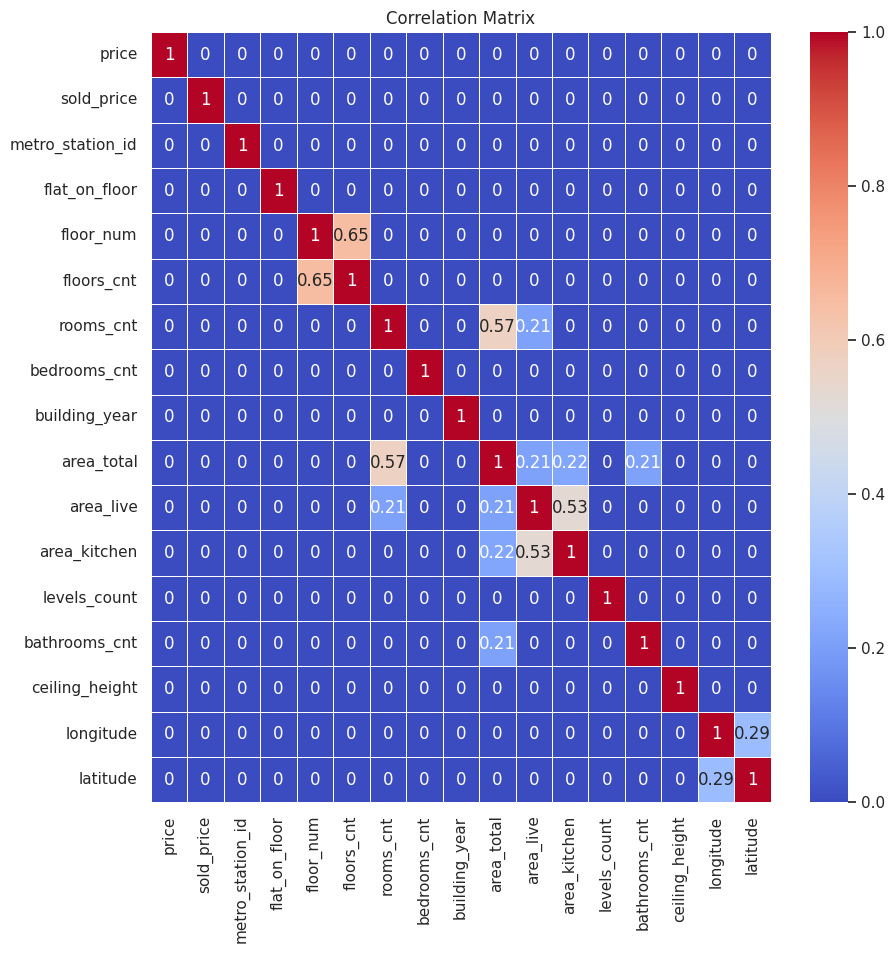

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 10))
sns.set(font_scale=1)

correlation_matrix = data_sold_flats.corr()
correlation_matrix = np.round(correlation_matrix, 2)
correlation_matrix[np.abs(correlation_matrix) < 0.2] = 0

sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()
